**Homework 3**


Jade Benson

*Part 1*

In this part, we are interested in exploring various machine learning techniques to determine whether a sample is a tumor or normal based on its gene expersion. First, I will use SciKit Learn to test multiple classifiers to determine tumor/normal status on the protein coding genes and then scale this up to the dataset with all genes. I chose to test random forest, naive bayes, and support vector classifier (SVC) as my classifical machine learning methods.  

In [2]:
#basic packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#sklearn packages
import sklearn
from sklearn import preprocessing, datasets, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate, train_test_split, cross_val_predict
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, accuracy_score
from sklearn.pipeline import make_pipeline

#random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#naive bayes 
from sklearn.naive_bayes import MultinomialNB

#Support Vector Classifier (SVC) 
from sklearn.svm import SVC

#feature selection 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif

#Keras 
from keras.models import Sequential 
from keras.layers import Dense

import tensorflow as tf 

#TPOT 
from tpot import TPOTClassifier


Classifying coding protein gene expression dataset using three classifical machine learning techniques. In this step, I use 5-fold cross-validation to determine which model is the most accurate and also has the highest true positive rate. 

In [3]:
coding_df = pd.read_csv("MLiB-Lab3-PartA/nt.coding.csv")

In [4]:
#pickling the dataframe allows me to load this faster in the future
coding_df.to_pickle("./coding_nt.pkl")

In [5]:
coding_df = pd.read_pickle("./coding_nt.pkl")

In [3]:
coding_df.shape

(1400, 19562)

In [4]:
coding_df.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,...,ENSG00000269699.4,ENSG00000269711.1,ENSG00000269741.4,ENSG00000269749.1,ENSG00000269755.1,ENSG00000269846.1,ENSG00000269855.2,ENSG00000269858.4,ENSG00000269881.1,ENSG00000269883.1
0,0,150265.480539,4327.845865,713909.310619,59794.653619,15491.855614,47067.296272,184497.123078,303028.753262,101488.999785,...,491.731252,0.00000,0.000000,0.000000,5530.025272,999.688930,2815.285593,80163.084910,6837.301541,200.744219
1,0,913228.181789,2326.284691,828500.414250,50302.756694,30476.958826,119788.855372,323720.579478,232881.114861,204409.893911,...,146.840679,0.00000,44133.486358,902.703869,0.000000,298.526889,106768.895783,55490.416008,742.455814,0.000000
2,0,359658.934678,228971.470681,483960.593070,69872.468893,16789.274018,76493.522968,735607.786830,512566.438580,108147.729799,...,427.189045,0.00000,0.000000,0.000000,3603.136170,217.118679,1528.603224,62677.148078,4319.906344,0.000000
3,1,135634.675596,0.000000,748257.784782,75504.611322,27890.960291,55978.045025,118630.138127,710455.556708,250891.525261,...,322.662334,0.00000,946.120078,661.189483,1555.144652,218.657354,16318.022871,54779.302382,5030.289480,0.000000
4,0,81454.831124,177.310309,363281.940134,45622.048124,8563.609511,687378.578868,143523.388792,459940.275222,45368.853671,...,201.460549,23513.58332,0.000000,619.239908,970.985025,0.000000,2595.178159,103692.697035,1909.921482,0.000000


In [8]:
coding_y = coding_df["Type"]

In [9]:
coding_x = coding_df.drop(columns = ["Type"])

In [18]:
#Define machine learning function so I can easily run this for the full N/T dataset and the Type problem in Part A, 2

def my_ML_models(x_df, y_df, ml_model):
    """
    Inputs:
        x_df: dataframe with gene expression values 
        y_df: dataframe with desired outcome (tumor status, type)
        ml_model: string with classic ML technique 
        current options: "Random Forest", "Naive Bayes", "SVC"
    
    Returns: 
        None
        Only prints various model performance statistics
    
    """
    
    if ml_model == "Random Forest": 
        pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
    
    elif ml_model == "Naive Bayes": 
        #need min/max scaler since NB can't handle negative values 
        pipe = make_pipeline(MinMaxScaler(), MultinomialNB())
    
    elif ml_model == "SVC":
        pipe = make_pipeline(StandardScaler(), SVC(gamma = "auto"))
        
    else: 
        print("I haven't defined that model yet")
        print("Only Random Forest, Naive Bayes, and SVC supported now")
    
    
    #predict y using the ML method above with 5-fold cross validation
    y_pred = cross_val_predict(pipe, x_df, y_df, cv = 5)
    
    #can just print metrics since we don't use them later 
    #update this if want more functionality 

    #confusion matrix
    print("Confusion Matrix: ", confusion_matrix(y_df, y_pred))

    #f1 scores 
    print("F1 Score", f1_score(y_df, y_pred))

    #Accuracy 
    print("Accuracy", accuracy_score(y_df, y_pred))
    

In [14]:
#Random forest on gene coding data 
my_ML_models(coding_x, coding_y, "Random Forest")

Confusion Matrix:  [[679  21]
 [ 20 680]]
F1 Score 0.9707351891506066
Accuracy 0.9707142857142858


In [16]:
#Naive Bayes on gene coding data
my_ML_models(coding_x, coding_y, "Naive Bayes")


Confusion Matrix:  [[637  63]
 [106 594]]
F1 Score 0.8754605747973472
Accuracy 0.8792857142857143


In [19]:
#SVC on gene coding data 
my_ML_models(coding_x, coding_y, "SVC")

Confusion Matrix:  [[645  55]
 [ 15 685]]
F1 Score 0.951388888888889
Accuracy 0.95


The random forest classifier performed the best in these cross-validation trials and achieved an impressive accuracy of 97%. Although the two other models also performed well with an accuracy of 88% and 95% for Naive Bayes and SVC, respectively. 

The true positive rate is also important as we don't want to miss tumors that were misidentified as normal which may impact an individual's survival. We have the highest rate of true positives in the random forest model too at about 97%. 

Next steps could include hyperparameter tuning to see if we can maximize these models with more specific parameters and we could expand the types of models that we are using. As we recently learned about in class though, we may see even better results if we could identify and use the high quality data.

*Feature Selection*

We will now select the top 100 genes needed to define a "gene signature" to identify the normal vs tumor samples. This type of dimension reduction is useful as much of the gene data can be correlated with each other and may not provide new information. Given that there are more predictors than outcomes, we can often improve our models by subsampling the most important features. Below I provide one example of how we can perform this feature selection using ANOVA F-tests. 

In [21]:
def anova_feature_selection(x_df, y_df, top_features_list, threshold):
    """
    Inputs:
        x_df: dataframe with gene expression values 
        y_df: dataframe with desired outcome (tumor status, type)
        top_features_list: initially empty list that will hold the top features
        threshold: the number of desired top features
    
    Returns: 
        dataframe of top 100 features 
    
    """
    
    feature_scores = mutual_info_classif(x_df, y_df, random_state=0)
    
    for score, f_name in sorted(zip(feature_scores, x_df.columns), reverse=True)[:threshold]:
        top_features_list.append(f_name)
    
    return x_df[top_features_list]
    

In [22]:
coding_features = []

top_features_df = anova_feature_selection(coding_x, coding_y, coding_features, 100)

In [24]:
#top 100 features 
top_features_df.columns

Index(['ENSG00000163815.5', 'ENSG00000099953.8', 'ENSG00000116194.11',
       'ENSG00000133800.7', 'ENSG00000108381.9', 'ENSG00000141338.12',
       'ENSG00000090889.11', 'ENSG00000154330.11', 'ENSG00000156298.11',
       'ENSG00000162062.13', 'ENSG00000168477.16', 'ENSG00000164530.12',
       'ENSG00000165795.19', 'ENSG00000187730.7', 'ENSG00000004776.10',
       'ENSG00000131747.13', 'ENSG00000112984.10', 'ENSG00000165072.9',
       'ENSG00000134201.9', 'ENSG00000029559.6', 'ENSG00000168309.15',
       'ENSG00000169258.6', 'ENSG00000154920.13', 'ENSG00000156970.11',
       'ENSG00000123485.10', 'ENSG00000189134.3', 'ENSG00000253953.2',
       'ENSG00000123500.8', 'ENSG00000183856.9', 'ENSG00000143476.16',
       'ENSG00000161888.10', 'ENSG00000161649.11', 'ENSG00000065328.15',
       'ENSG00000166091.18', 'ENSG00000075218.17', 'ENSG00000111404.5',
       'ENSG00000150625.15', 'ENSG00000186185.12', 'ENSG00000165304.6',
       'ENSG00000101412.12', 'ENSG00000034971.13', 'ENSG0000011914

These are the top 100 most influential genes for tumor vs normal tissue prediction. We could then use these features in future iterations of our machine learning models to see if they preform better or continue to reduce the dimensions and perform clustering to see what informative patterns emerge. These are all techniques we can use to turn many complicated features into useful smaller sets of features while retaining the same information. We could try other feature selection methods to see if we maintain the same information like random forest feature selection or PCA. If these results are maintaining relatively consistent, we might be able to make stronger conclusions about what these genes mean for tissue classification and/or tumor development. 

*Keras* 

We can now examine how deep learning algorithms (keras) perform on the same classification task. Will this method perform better than the classical ML techniques?   

In [30]:

def my_keras(x_df, y_df, validation_value):
    """
    Inputs:
        x_df: dataframe with gene expression values 
        y_df: dataframe with desired outcome (tumor status, type)
        validation_value: float of validation set proportion 
    
    Returns: 
       None
       prints plot of test vs. training accuracy 
    
    """
   
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2)
    ])


    # Compile model
    model.compile(optimizer='adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Fit the model
    coding = model.fit(x_df, y_df, validation_split=validation_value, epochs=10)


    # summarize history for accuracy
    #display plots of the training and test accuracy 
    plt.plot(coding.history['accuracy'])
    plt.plot(coding.history['val_accuracy'])
    plt.title('Model Accuracy for Validation Set Size: ' + str(validation_value))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    

Epoch 1/10
44/44 [==============================] - 1s 17ms/step - loss: 0.6812 - accuracy: 0.6804 - val_loss: 0.6529 - val_accuracy: 0.8571
Epoch 2/10
44/44 [==============================] - 0s 8ms/step - loss: 0.6363 - accuracy: 0.8117 - val_loss: 0.5834 - val_accuracy: 1.0000
Epoch 3/10
44/44 [==============================] - 0s 6ms/step - loss: 0.5645 - accuracy: 0.8622 - val_loss: 0.4947 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 0s 6ms/step - loss: 0.4828 - accuracy: 0.8932 - val_loss: 0.4064 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.9278 - val_loss: 0.3267 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 0s 6ms/step - loss: 0.3434 - accuracy: 0.9365 - val_loss: 0.2676 - val_accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.9481 - val_loss: 0.2136 - val_accuracy: 1.0000
Epoch 8/10
44/44 [=

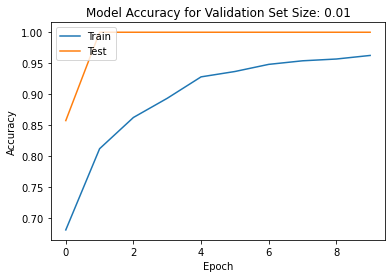

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 0.6842 - accuracy: 0.5376 - val_loss: 0.6747 - val_accuracy: 0.7714
Epoch 2/10
42/42 [==============================] - 0s 8ms/step - loss: 0.6524 - accuracy: 0.7797 - val_loss: 0.6372 - val_accuracy: 0.8429
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6050 - accuracy: 0.8353 - val_loss: 0.5832 - val_accuracy: 0.9000
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 0.5441 - accuracy: 0.8955 - val_loss: 0.5167 - val_accuracy: 0.9143
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 0.9323 - val_loss: 0.4529 - val_accuracy: 0.9286
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.4178 - accuracy: 0.9406 - val_loss: 0.3888 - val_accuracy: 0.9143
Epoch 7/10
42/42 [==============================] - 0s 7ms/step - loss: 0.3636 - accuracy: 0.9511 - val_loss: 0.3369 - val_accuracy: 0.9143
Epoch 8/10
42/42 [==

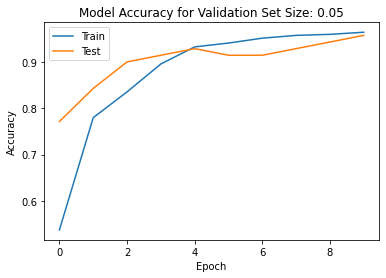

Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 0.6864 - accuracy: 0.6381 - val_loss: 0.6727 - val_accuracy: 0.7000
Epoch 2/10
40/40 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.7754 - val_loss: 0.6276 - val_accuracy: 0.7357
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.8357 - val_loss: 0.5651 - val_accuracy: 0.8500
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5372 - accuracy: 0.8579 - val_loss: 0.4960 - val_accuracy: 0.9000
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.9024 - val_loss: 0.4240 - val_accuracy: 0.9429
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.9206 - val_loss: 0.3653 - val_accuracy: 0.9357
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.3509 - accuracy: 0.9444 - val_loss: 0.3110 - val_accuracy: 0.9500
Epoch 8/10
40/40 [==

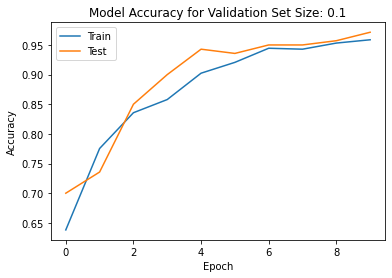

Epoch 1/10
38/38 [==============================] - 1s 12ms/step - loss: 0.6819 - accuracy: 0.6479 - val_loss: 0.6681 - val_accuracy: 0.8143
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6427 - accuracy: 0.8227 - val_loss: 0.6191 - val_accuracy: 0.7429
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5877 - accuracy: 0.8244 - val_loss: 0.5566 - val_accuracy: 0.7857
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5216 - accuracy: 0.8714 - val_loss: 0.4882 - val_accuracy: 0.8714
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4533 - accuracy: 0.8908 - val_loss: 0.4229 - val_accuracy: 0.9190
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3951 - accuracy: 0.9160 - val_loss: 0.3658 - val_accuracy: 0.9476
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3379 - accuracy: 0.9395 - val_loss: 0.3305 - val_accuracy: 0.9333
Epoch 8/10
38/38 [=

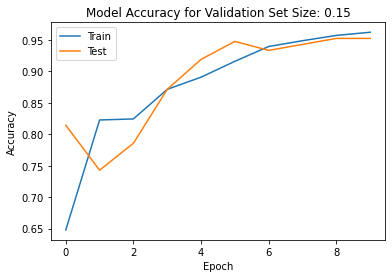

Epoch 1/10
35/35 [==============================] - 1s 13ms/step - loss: 0.6834 - accuracy: 0.6295 - val_loss: 0.6697 - val_accuracy: 0.8429
Epoch 2/10
35/35 [==============================] - 0s 8ms/step - loss: 0.6515 - accuracy: 0.8098 - val_loss: 0.6343 - val_accuracy: 0.8143
Epoch 3/10
35/35 [==============================] - 0s 8ms/step - loss: 0.6096 - accuracy: 0.8357 - val_loss: 0.5829 - val_accuracy: 0.8893
Epoch 4/10
35/35 [==============================] - 0s 8ms/step - loss: 0.5553 - accuracy: 0.8714 - val_loss: 0.5260 - val_accuracy: 0.9071
Epoch 5/10
35/35 [==============================] - 0s 7ms/step - loss: 0.4974 - accuracy: 0.9027 - val_loss: 0.4637 - val_accuracy: 0.9286
Epoch 6/10
35/35 [==============================] - 0s 10ms/step - loss: 0.4396 - accuracy: 0.9170 - val_loss: 0.4070 - val_accuracy: 0.9393
Epoch 7/10
35/35 [==============================] - 0s 8ms/step - loss: 0.3876 - accuracy: 0.9312 - val_loss: 0.3594 - val_accuracy: 0.9286
Epoch 8/10
35/35 [

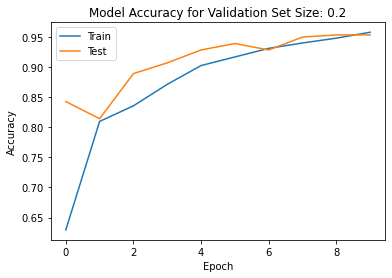

Epoch 1/10
33/33 [==============================] - 1s 13ms/step - loss: 0.6827 - accuracy: 0.6429 - val_loss: 0.6696 - val_accuracy: 0.7657
Epoch 2/10
33/33 [==============================] - 0s 7ms/step - loss: 0.6499 - accuracy: 0.7867 - val_loss: 0.6314 - val_accuracy: 0.8086
Epoch 3/10
33/33 [==============================] - 0s 7ms/step - loss: 0.6034 - accuracy: 0.8324 - val_loss: 0.5811 - val_accuracy: 0.7543
Epoch 4/10
33/33 [==============================] - 0s 9ms/step - loss: 0.5459 - accuracy: 0.8381 - val_loss: 0.5203 - val_accuracy: 0.8886
Epoch 5/10
33/33 [==============================] - 0s 8ms/step - loss: 0.4844 - accuracy: 0.8790 - val_loss: 0.4549 - val_accuracy: 0.8857
Epoch 6/10
33/33 [==============================] - 0s 8ms/step - loss: 0.4251 - accuracy: 0.9238 - val_loss: 0.3946 - val_accuracy: 0.9286
Epoch 7/10
33/33 [==============================] - 0s 8ms/step - loss: 0.3747 - accuracy: 0.9229 - val_loss: 0.3454 - val_accuracy: 0.9457
Epoch 8/10
33/33 [=

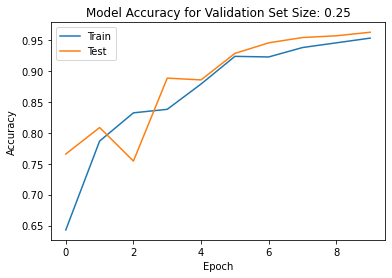

Epoch 1/10
31/31 [==============================] - 1s 15ms/step - loss: 0.6845 - accuracy: 0.6507 - val_loss: 0.6741 - val_accuracy: 0.6983
Epoch 2/10
31/31 [==============================] - 0s 8ms/step - loss: 0.6568 - accuracy: 0.7232 - val_loss: 0.6426 - val_accuracy: 0.8029
Epoch 3/10
31/31 [==============================] - 0s 10ms/step - loss: 0.6159 - accuracy: 0.8029 - val_loss: 0.5988 - val_accuracy: 0.8219
Epoch 4/10
31/31 [==============================] - 0s 8ms/step - loss: 0.5646 - accuracy: 0.8243 - val_loss: 0.5458 - val_accuracy: 0.8646
Epoch 5/10
31/31 [==============================] - 0s 9ms/step - loss: 0.5085 - accuracy: 0.8723 - val_loss: 0.4904 - val_accuracy: 0.8884
Epoch 6/10
31/31 [==============================] - 0s 10ms/step - loss: 0.4544 - accuracy: 0.8917 - val_loss: 0.4348 - val_accuracy: 0.9026
Epoch 7/10
31/31 [==============================] - 0s 9ms/step - loss: 0.4025 - accuracy: 0.9244 - val_loss: 0.3882 - val_accuracy: 0.9216
Epoch 8/10
31/31 

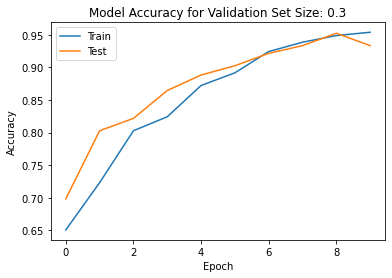

Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 0.6870 - accuracy: 0.5560 - val_loss: 0.6797 - val_accuracy: 0.6714
Epoch 2/10
27/27 [==============================] - 0s 9ms/step - loss: 0.6684 - accuracy: 0.7321 - val_loss: 0.6608 - val_accuracy: 0.8071
Epoch 3/10
27/27 [==============================] - 0s 9ms/step - loss: 0.6441 - accuracy: 0.8310 - val_loss: 0.6373 - val_accuracy: 0.8125
Epoch 4/10
27/27 [==============================] - 0s 9ms/step - loss: 0.6162 - accuracy: 0.8357 - val_loss: 0.6092 - val_accuracy: 0.8375
Epoch 5/10
27/27 [==============================] - 0s 9ms/step - loss: 0.5821 - accuracy: 0.8607 - val_loss: 0.5738 - val_accuracy: 0.8589
Epoch 6/10
27/27 [==============================] - 0s 9ms/step - loss: 0.5426 - accuracy: 0.8786 - val_loss: 0.5351 - val_accuracy: 0.8929
Epoch 7/10
27/27 [==============================] - 0s 8ms/step - loss: 0.5033 - accuracy: 0.9000 - val_loss: 0.4972 - val_accuracy: 0.8982
Epoch 8/10
27/27 [=

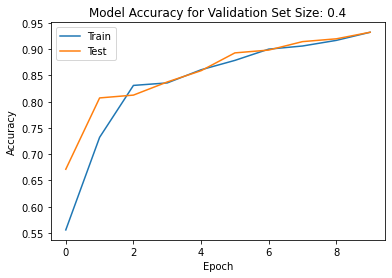

Epoch 1/10
22/22 [==============================] - 1s 20ms/step - loss: 0.6888 - accuracy: 0.5171 - val_loss: 0.6821 - val_accuracy: 0.6829
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 0.6740 - accuracy: 0.7857 - val_loss: 0.6645 - val_accuracy: 0.8300
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 0.6525 - accuracy: 0.8357 - val_loss: 0.6408 - val_accuracy: 0.8371
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 0.6243 - accuracy: 0.8457 - val_loss: 0.6104 - val_accuracy: 0.8429
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 0.5898 - accuracy: 0.8657 - val_loss: 0.5755 - val_accuracy: 0.8657
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 0.5521 - accuracy: 0.8643 - val_loss: 0.5369 - val_accuracy: 0.8900
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 0.5126 - accuracy: 0.8857 - val_loss: 0.4995 - val_accuracy: 0.8886
Epoch 8/10
22/22 [=

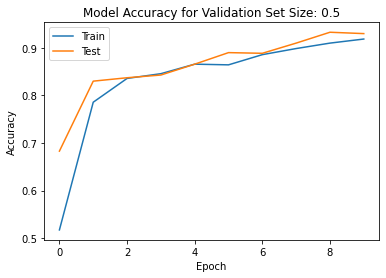

Epoch 1/10
18/18 [==============================] - 1s 25ms/step - loss: 0.6901 - accuracy: 0.6268 - val_loss: 0.6857 - val_accuracy: 0.7405
Epoch 2/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.7089 - val_loss: 0.6751 - val_accuracy: 0.7893
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6694 - accuracy: 0.7536 - val_loss: 0.6617 - val_accuracy: 0.8083
Epoch 4/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6517 - accuracy: 0.8357 - val_loss: 0.6421 - val_accuracy: 0.8083
Epoch 5/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6271 - accuracy: 0.8304 - val_loss: 0.6197 - val_accuracy: 0.7726
Epoch 6/10
18/18 [==============================] - 0s 11ms/step - loss: 0.5986 - accuracy: 0.8214 - val_loss: 0.5920 - val_accuracy: 0.8238
Epoch 7/10
18/18 [==============================] - 0s 13ms/step - loss: 0.5677 - accuracy: 0.8607 - val_loss: 0.5625 - val_accuracy: 0.8583
Epoch 8/10
18

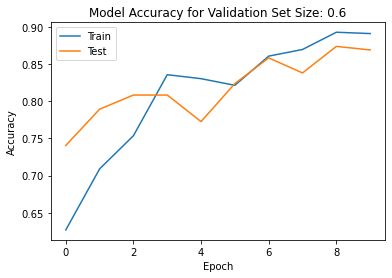

In [31]:
#scale x values (keras needs between 0 - 1)

code_max = max(np.max(coding_x))
coding_x_scaled = coding_x/code_max

#10 validation sets 
validation_sets = [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5, 0.6]

for i in range(len(validation_sets)): 
    my_keras(coding_x_scaled, coding_y, validation_sets[i])

We see some interesting patterns in the training and test accuracies as we vary the validation set size. The smallest validation set sizes quickly reach maximum accuracy (1) because they are so small and the model can train on all of the other data, which gives us those initially surprising patterns of higher test accuracies. The more standard validation set sizes (around 0.2) see patterns where both accuracies increase over the number of epochs. In the 0.3 case, we see that the model starts overfitting at the end with the dip in testing accuracy. Too large of a training set is not as useful (0.6) as seen with the low accuracy values. Overall, the deep learning approach does an excellent job at classifying tissues using the coding gene expression data. However, even the best deep learning models accuracy are comparable to the untuned random forest classical machine learning model (97%). This may be an upperlimit in how accurate our predictions can be given the data quality and link between just the coding genes and the tissue type. Perhaps more gene information will improve these predictions or they may just add extra noise and unnecessary information - let's explore below. 

Extra Credit #1 TPOT

I attempted to run TPOT as an automated approach to machine learning. This presents an exciting opportunity to optimize these complicated models without having to perform the hyperparameter tuning and model selection ourselves. However, it takes a very long time to run and seemed infeasible for even this smaller dataset to run on my personal computer with the short time frame and other tasks to complete. I think in the future I might try to see if I could parallelize this code or run it remotely on AWS or Midway in the background. For now, I leave this as a proof-of-concept. 

In [143]:
X_train, X_test, y_train, y_test = train_test_split(code_x, code_y,
                                                    train_size=0.80, test_size=0.20, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)
0.9142857142857143


**Full Gene Dataset** 

We will now perform the same process as above, but on the full gene expression data set. Will more genes allow us better predictions? 

In [32]:
all_df = pd.read_csv("MLiB-Lab3-PartA/nt.all.csv")

In [33]:
#run this faster in future
all_df.to_pickle("./all_nt.pkl")

In [34]:
all_df = pd.read_pickle("./all_nt.pkl")

In [14]:
#all has about 3X the amount of genes as the coding one
all_df.shape

(1400, 60484)

In [10]:
all_df.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,...,ENSGR0000263980.4,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1
0,0,150265.480539,4327.845865,713909.310619,59794.653619,15491.855614,47067.296272,184497.123078,303028.753262,101488.999785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,913228.181789,2326.284691,828500.414250,50302.756694,30476.958826,119788.855372,323720.579478,232881.114861,204409.893911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,359658.934678,228971.470681,483960.593070,69872.468893,16789.274018,76493.522968,735607.786830,512566.438580,108147.729799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,135634.675596,0.000000,748257.784782,75504.611322,27890.960291,55978.045025,118630.138127,710455.556708,250891.525261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,81454.831124,177.310309,363281.940134,45622.048124,8563.609511,687378.578868,143523.388792,459940.275222,45368.853671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
all_y = all_df["Type"]
all_x = all_df.drop(columns = ["Type"])

In [37]:
#Random forest on all gene data 
my_ML_models(all_x, all_y, "Random Forest")
#very similar to coding set results!

Confusion Matrix:  [[678  22]
 [ 21 679]]
F1 Score 0.9693076374018558
Accuracy 0.9692857142857143


In [38]:
#Naive Bayes on all gene data
my_ML_models(all_x, all_y, "Naive Bayes")
#slightly worse on the full dataset than the earlier coding

Confusion Matrix:  [[670  30]
 [224 476]]
F1 Score 0.7893864013266999
Accuracy 0.8185714285714286


In [39]:
#SVC on all gene data 
my_ML_models(all_x, all_y, "SVC")

Confusion Matrix:  [[565 135]
 [ 12 688]]
F1 Score 0.9034799737360473
Accuracy 0.895


We arrived at the same results with the full gene dataset as the coding set as to which classical machine learning model performed best. This is likely because the gene coding features are the most important and might be driving the classification. The best model again was the random forest with similar accuracy (97%) and true positive rates (97%) as before. 

*Feature Selection* 

Again, we perform feature selection but this time on the full gene expression data set. I am curious whether these identied the same top 100 features which might explain the similar model results, too. 

In [40]:
all_features = []

all_top_features_df = anova_feature_selection(all_x, all_y, all_features, 100)

all_top_features_df.columns

Index(['ENSG00000163815.5', 'ENSG00000099953.8', 'ENSG00000260920.2',
       'ENSG00000116194.11', 'ENSG00000133800.7', 'ENSG00000108381.9',
       'ENSG00000141338.12', 'ENSG00000090889.11', 'ENSG00000154330.11',
       'ENSG00000156298.11', 'ENSG00000162062.13', 'ENSG00000029559.6',
       'ENSG00000168477.16', 'ENSG00000224958.4', 'ENSG00000164530.12',
       'ENSG00000165795.19', 'ENSG00000187730.7', 'ENSG00000004776.10',
       'ENSG00000131747.13', 'ENSG00000112984.10', 'ENSG00000165072.9',
       'ENSG00000134201.9', 'ENSG00000123500.8', 'ENSG00000168309.15',
       'ENSG00000169258.6', 'ENSG00000276043.3', 'ENSG00000154920.13',
       'ENSG00000156970.11', 'ENSG00000123485.10', 'ENSG00000253953.2',
       'ENSG00000189134.3', 'ENSG00000183856.9', 'ENSG00000143476.16',
       'ENSG00000161888.10', 'ENSG00000161649.11', 'ENSG00000065328.15',
       'ENSG00000075218.17', 'ENSG00000166091.18', 'ENSG00000111404.5',
       'ENSG00000186185.12', 'ENSG00000150625.15', 'ENSG00000165304.

Did the full dataset add any new genes that were in the top 100 features as opposed to just those identified in the coding dataset?

In [41]:
all_top_features_df.columns == top_features_df.columns

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

THe top 100 new features only have 3 genes in common with the coding dataset! I find this really interesting but am unsure about the practical implications of this finding. Should we prioritize those genes identified in the coding run or in this full dataset? Why is there such low agreement? I'd be curious to explore this more and talk to you about why this is happening. Is this just a poor feature selection technique? 

*Keras* 

Try the deep learning approach on the larger dataset, perhaps it will perform better on larger datasets than the classical techniques. 

Epoch 1/10
44/44 [==============================] - 1s 21ms/step - loss: 0.6899 - accuracy: 0.5981 - val_loss: 0.6822 - val_accuracy: 0.7857
Epoch 2/10
44/44 [==============================] - 1s 19ms/step - loss: 0.6735 - accuracy: 0.7114 - val_loss: 0.6516 - val_accuracy: 0.9286
Epoch 3/10
44/44 [==============================] - 1s 20ms/step - loss: 0.6421 - accuracy: 0.8232 - val_loss: 0.6091 - val_accuracy: 0.9286
Epoch 4/10
44/44 [==============================] - 1s 18ms/step - loss: 0.6015 - accuracy: 0.8312 - val_loss: 0.5552 - val_accuracy: 0.9286
Epoch 5/10
44/44 [==============================] - 1s 20ms/step - loss: 0.5533 - accuracy: 0.8622 - val_loss: 0.5029 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 1s 18ms/step - loss: 0.4971 - accuracy: 0.9163 - val_loss: 0.4472 - val_accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 1s 18ms/step - loss: 0.4446 - accuracy: 0.9278 - val_loss: 0.3929 - val_accuracy: 1.0000
Epoch 8/10
44

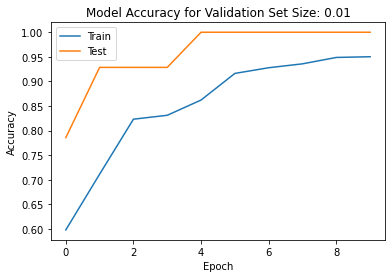

Epoch 1/10
42/42 [==============================] - 1s 23ms/step - loss: 0.6878 - accuracy: 0.6414 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 2/10
42/42 [==============================] - 1s 19ms/step - loss: 0.6666 - accuracy: 0.7211 - val_loss: 0.6596 - val_accuracy: 0.7286
Epoch 3/10
42/42 [==============================] - 1s 20ms/step - loss: 0.6304 - accuracy: 0.8030 - val_loss: 0.6028 - val_accuracy: 0.8000
Epoch 4/10
42/42 [==============================] - 1s 21ms/step - loss: 0.5859 - accuracy: 0.8226 - val_loss: 0.5535 - val_accuracy: 0.8714
Epoch 5/10
42/42 [==============================] - 1s 21ms/step - loss: 0.5331 - accuracy: 0.8737 - val_loss: 0.5057 - val_accuracy: 0.9143
Epoch 6/10
42/42 [==============================] - 1s 17ms/step - loss: 0.4780 - accuracy: 0.9165 - val_loss: 0.4485 - val_accuracy: 0.9143
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 0.4282 - accuracy: 0.9308 - val_loss: 0.3983 - val_accuracy: 0.9143
Epoch 8/10
42

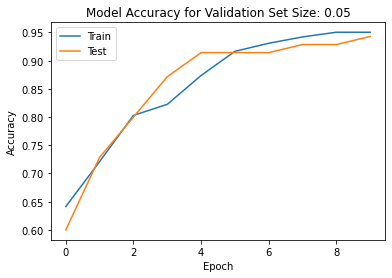

Epoch 1/10
40/40 [==============================] - 2s 28ms/step - loss: 0.6892 - accuracy: 0.5421 - val_loss: 0.6827 - val_accuracy: 0.6429
Epoch 2/10
40/40 [==============================] - 1s 23ms/step - loss: 0.6732 - accuracy: 0.6960 - val_loss: 0.6594 - val_accuracy: 0.8286
Epoch 3/10
40/40 [==============================] - 1s 22ms/step - loss: 0.6439 - accuracy: 0.8183 - val_loss: 0.6252 - val_accuracy: 0.8571
Epoch 4/10
40/40 [==============================] - 1s 22ms/step - loss: 0.6031 - accuracy: 0.8365 - val_loss: 0.5834 - val_accuracy: 0.8571
Epoch 5/10
40/40 [==============================] - 1s 21ms/step - loss: 0.5576 - accuracy: 0.8516 - val_loss: 0.5276 - val_accuracy: 0.8857
Epoch 6/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5047 - accuracy: 0.9095 - val_loss: 0.4736 - val_accuracy: 0.9071
Epoch 7/10
40/40 [==============================] - 1s 24ms/step - loss: 0.4551 - accuracy: 0.9302 - val_loss: 0.4182 - val_accuracy: 0.9286
Epoch 8/10
40

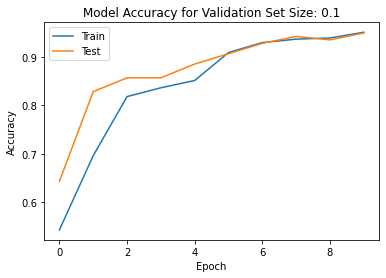

Epoch 1/10
38/38 [==============================] - 2s 34ms/step - loss: 0.6899 - accuracy: 0.5092 - val_loss: 0.6861 - val_accuracy: 0.5095
Epoch 2/10
38/38 [==============================] - 1s 18ms/step - loss: 0.6772 - accuracy: 0.7504 - val_loss: 0.6699 - val_accuracy: 0.8190
Epoch 3/10
38/38 [==============================] - 1s 21ms/step - loss: 0.6560 - accuracy: 0.8092 - val_loss: 0.6435 - val_accuracy: 0.7667
Epoch 4/10
38/38 [==============================] - 1s 18ms/step - loss: 0.6261 - accuracy: 0.8143 - val_loss: 0.6126 - val_accuracy: 0.8429
Epoch 5/10
38/38 [==============================] - 1s 18ms/step - loss: 0.5896 - accuracy: 0.8513 - val_loss: 0.5741 - val_accuracy: 0.8714
Epoch 6/10
38/38 [==============================] - 1s 18ms/step - loss: 0.5491 - accuracy: 0.8714 - val_loss: 0.5336 - val_accuracy: 0.9000
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 0.5096 - accuracy: 0.8866 - val_loss: 0.4898 - val_accuracy: 0.8952
Epoch 8/10
38

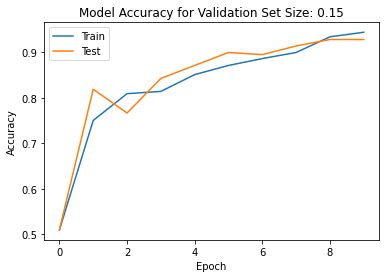

Epoch 1/10
35/35 [==============================] - 2s 38ms/step - loss: 0.6886 - accuracy: 0.6179 - val_loss: 0.6810 - val_accuracy: 0.8179
Epoch 2/10
35/35 [==============================] - 1s 22ms/step - loss: 0.6690 - accuracy: 0.7429 - val_loss: 0.6566 - val_accuracy: 0.8464
Epoch 3/10
35/35 [==============================] - 1s 18ms/step - loss: 0.6383 - accuracy: 0.7920 - val_loss: 0.6205 - val_accuracy: 0.7786
Epoch 4/10
35/35 [==============================] - 1s 18ms/step - loss: 0.5992 - accuracy: 0.8116 - val_loss: 0.5782 - val_accuracy: 0.8429
Epoch 5/10
35/35 [==============================] - 1s 17ms/step - loss: 0.5549 - accuracy: 0.8214 - val_loss: 0.5421 - val_accuracy: 0.8500
Epoch 6/10
35/35 [==============================] - 1s 17ms/step - loss: 0.5158 - accuracy: 0.8420 - val_loss: 0.4914 - val_accuracy: 0.8964
Epoch 7/10
35/35 [==============================] - 1s 17ms/step - loss: 0.4671 - accuracy: 0.9062 - val_loss: 0.4398 - val_accuracy: 0.9286
Epoch 8/10
35

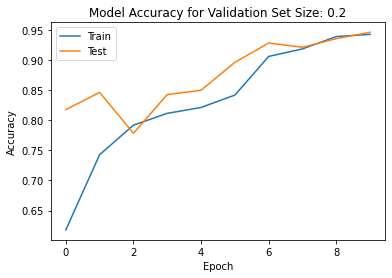

Epoch 1/10
33/33 [==============================] - 1s 33ms/step - loss: 0.6889 - accuracy: 0.6381 - val_loss: 0.6830 - val_accuracy: 0.7543
Epoch 2/10
33/33 [==============================] - 1s 22ms/step - loss: 0.6742 - accuracy: 0.7486 - val_loss: 0.6655 - val_accuracy: 0.7743
Epoch 3/10
33/33 [==============================] - 1s 19ms/step - loss: 0.6520 - accuracy: 0.7924 - val_loss: 0.6419 - val_accuracy: 0.7543
Epoch 4/10
33/33 [==============================] - 1s 19ms/step - loss: 0.6234 - accuracy: 0.7543 - val_loss: 0.6118 - val_accuracy: 0.8229
Epoch 5/10
33/33 [==============================] - 1s 20ms/step - loss: 0.5912 - accuracy: 0.8133 - val_loss: 0.5776 - val_accuracy: 0.7829
Epoch 6/10
33/33 [==============================] - 1s 17ms/step - loss: 0.5528 - accuracy: 0.8562 - val_loss: 0.5385 - val_accuracy: 0.8429
Epoch 7/10
33/33 [==============================] - 1s 17ms/step - loss: 0.5126 - accuracy: 0.8781 - val_loss: 0.4972 - val_accuracy: 0.9029
Epoch 8/10
33

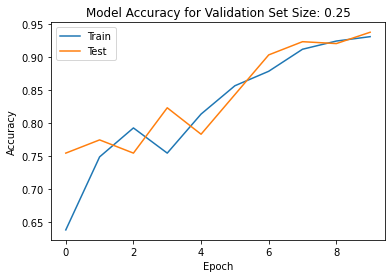

Epoch 1/10
31/31 [==============================] - 2s 39ms/step - loss: 0.6899 - accuracy: 0.5975 - val_loss: 0.6855 - val_accuracy: 0.6817
Epoch 2/10
31/31 [==============================] - 1s 20ms/step - loss: 0.6784 - accuracy: 0.7191 - val_loss: 0.6722 - val_accuracy: 0.7221
Epoch 3/10
31/31 [==============================] - 1s 20ms/step - loss: 0.6599 - accuracy: 0.7518 - val_loss: 0.6512 - val_accuracy: 0.7625
Epoch 4/10
31/31 [==============================] - 1s 18ms/step - loss: 0.6330 - accuracy: 0.7783 - val_loss: 0.6244 - val_accuracy: 0.7933
Epoch 5/10
31/31 [==============================] - 1s 19ms/step - loss: 0.6025 - accuracy: 0.8284 - val_loss: 0.5936 - val_accuracy: 0.8337
Epoch 6/10
31/31 [==============================] - 1s 22ms/step - loss: 0.5698 - accuracy: 0.8110 - val_loss: 0.5595 - val_accuracy: 0.8694
Epoch 7/10
31/31 [==============================] - 1s 22ms/step - loss: 0.5319 - accuracy: 0.8693 - val_loss: 0.5264 - val_accuracy: 0.8314
Epoch 8/10
31

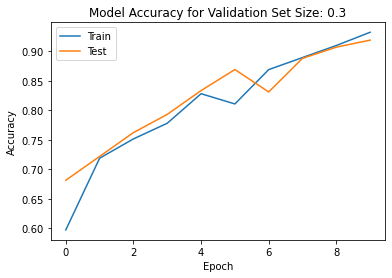

Epoch 1/10
27/27 [==============================] - 2s 62ms/step - loss: 0.6905 - accuracy: 0.5464 - val_loss: 0.6864 - val_accuracy: 0.6518
Epoch 2/10
27/27 [==============================] - 1s 29ms/step - loss: 0.6789 - accuracy: 0.7595 - val_loss: 0.6738 - val_accuracy: 0.7107
Epoch 3/10
27/27 [==============================] - 1s 32ms/step - loss: 0.6617 - accuracy: 0.7262 - val_loss: 0.6567 - val_accuracy: 0.6536
Epoch 4/10
27/27 [==============================] - 1s 27ms/step - loss: 0.6391 - accuracy: 0.7857 - val_loss: 0.6350 - val_accuracy: 0.7232
Epoch 5/10
27/27 [==============================] - 1s 28ms/step - loss: 0.6113 - accuracy: 0.7619 - val_loss: 0.6096 - val_accuracy: 0.7929
Epoch 6/10
27/27 [==============================] - 1s 34ms/step - loss: 0.5818 - accuracy: 0.8238 - val_loss: 0.5821 - val_accuracy: 0.7589
Epoch 7/10
27/27 [==============================] - 1s 27ms/step - loss: 0.5486 - accuracy: 0.8381 - val_loss: 0.5509 - val_accuracy: 0.8286
Epoch 8/10
27

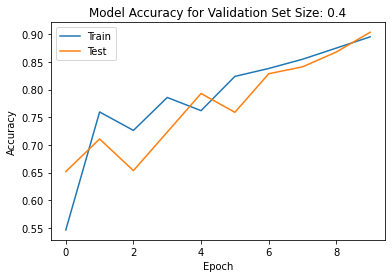

Epoch 1/10
22/22 [==============================] - 2s 76ms/step - loss: 0.6916 - accuracy: 0.5014 - val_loss: 0.6881 - val_accuracy: 0.5214
Epoch 2/10
22/22 [==============================] - 1s 30ms/step - loss: 0.6847 - accuracy: 0.7686 - val_loss: 0.6806 - val_accuracy: 0.8043
Epoch 3/10
22/22 [==============================] - 1s 31ms/step - loss: 0.6754 - accuracy: 0.8086 - val_loss: 0.6692 - val_accuracy: 0.7929
Epoch 4/10
22/22 [==============================] - 1s 31ms/step - loss: 0.6620 - accuracy: 0.8100 - val_loss: 0.6550 - val_accuracy: 0.7971
Epoch 5/10
22/22 [==============================] - 1s 35ms/step - loss: 0.6462 - accuracy: 0.8014 - val_loss: 0.6380 - val_accuracy: 0.7886
Epoch 6/10
22/22 [==============================] - 1s 30ms/step - loss: 0.6274 - accuracy: 0.8014 - val_loss: 0.6188 - val_accuracy: 0.8043
Epoch 7/10
22/22 [==============================] - 1s 30ms/step - loss: 0.6055 - accuracy: 0.8314 - val_loss: 0.5976 - val_accuracy: 0.8414
Epoch 8/10
22

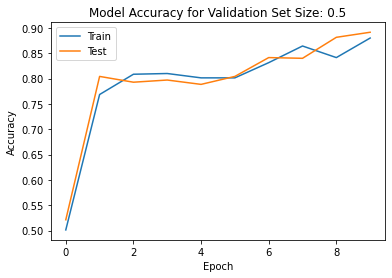

Epoch 1/10
18/18 [==============================] - 2s 108ms/step - loss: 0.6924 - accuracy: 0.5661 - val_loss: 0.6909 - val_accuracy: 0.5560
Epoch 2/10
18/18 [==============================] - 1s 29ms/step - loss: 0.6891 - accuracy: 0.6018 - val_loss: 0.6870 - val_accuracy: 0.5821
Epoch 3/10
18/18 [==============================] - 1s 31ms/step - loss: 0.6839 - accuracy: 0.6982 - val_loss: 0.6812 - val_accuracy: 0.6619
Epoch 4/10
18/18 [==============================] - 1s 36ms/step - loss: 0.6766 - accuracy: 0.7054 - val_loss: 0.6734 - val_accuracy: 0.6298
Epoch 5/10
18/18 [==============================] - 1s 32ms/step - loss: 0.6670 - accuracy: 0.6607 - val_loss: 0.6626 - val_accuracy: 0.6560
Epoch 6/10
18/18 [==============================] - 1s 39ms/step - loss: 0.6539 - accuracy: 0.7714 - val_loss: 0.6495 - val_accuracy: 0.7429
Epoch 7/10
18/18 [==============================] - 1s 33ms/step - loss: 0.6394 - accuracy: 0.8000 - val_loss: 0.6347 - val_accuracy: 0.7988
Epoch 8/10
1

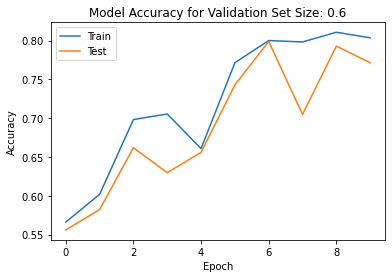

In [42]:
#scale x values (keras needs between 0 - 1)

all_max = max(np.max(all_x))
all_x_scaled = all_x/all_max


for i in range(len(validation_sets)): 
    my_keras(all_x_scaled, all_y, validation_sets[i])

We see much more variation in the Keras results on the full dataset as opposed to the coding dataset. Even the best performing deep learning model, with a regular 80/20 split sees a maximum accuracy of 95% which is a few points below the random forest classifier. The deep learning model may be picking up and learning more of the noise in this many features. In the next dataset, I try running keras on the top 100 features and it gives me better results. 

*Conclusion*

Overall, I think the classical machine learning models did an excellent job at identifying the tissue type with accuracies and true positive rates at 97% for both the coding and full datasets. I think these results could be further refined with hyperparameter tuning. In future work, I would be interested in exploring which genes had the most influential effects on these models and why that might be the case. As we discussed, different studies may have different data quality so I would be curious to run these same models on other datasets to test their consistency. Of course, we would need further testing of different models, parameters, and data before we would be able to use this in clinical practice - but I think these are very promising results to continue working in that direction